In [2]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image


df = pd.read_csv("fashion-dataset\styles.csv", on_bad_lines="skip")
print("Initial dataset shape:", df.shape)


df = df.dropna(subset=["id", "baseColour", "articleType", "gender", "season"])
print("After dropping missing rows:", df.shape)

df["baseColour"] = df["baseColour"].str.strip().str.title()
df["articleType"] = df["articleType"].str.strip().str.title()
df["gender"] = df["gender"].str.strip().str.capitalize()
df["season"] = df["season"].str.strip().str.capitalize()


df.head()


Initial dataset shape: (44424, 10)
After dropping missing rows: (44388, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [10]:
print("Unique base colours:", df["baseColour"].nunique())
print("Unique article types:", df["articleType"].nunique())
print("Unique seasons:", df["season"].nunique())
print("Unique genders:", df["gender"].nunique())


Unique base colours: 46
Unique article types: 143
Unique seasons: 4
Unique genders: 5


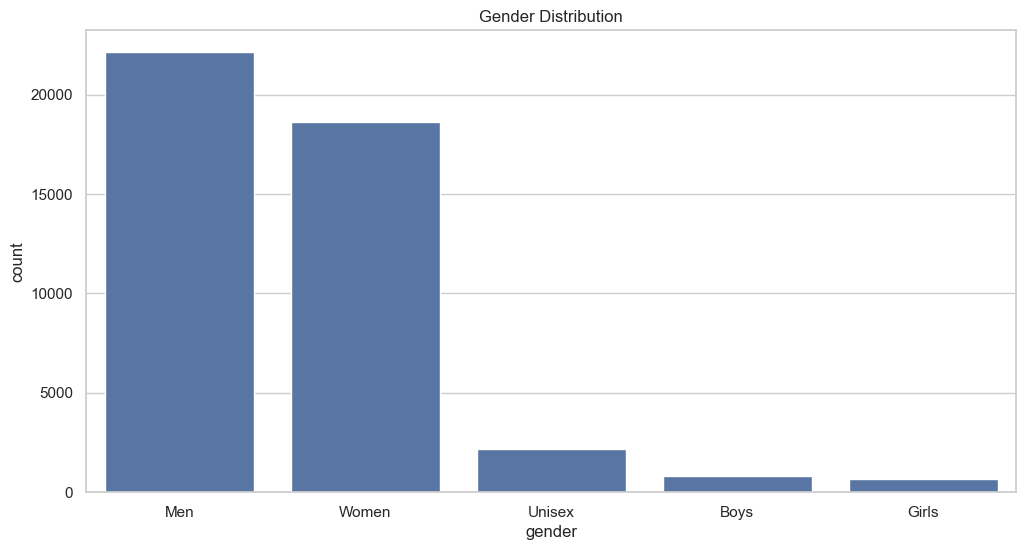

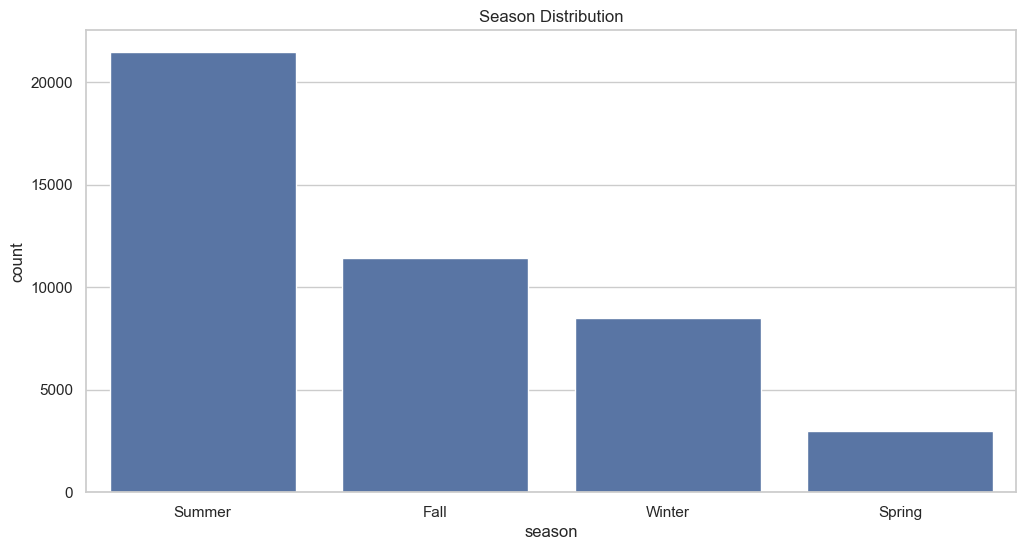

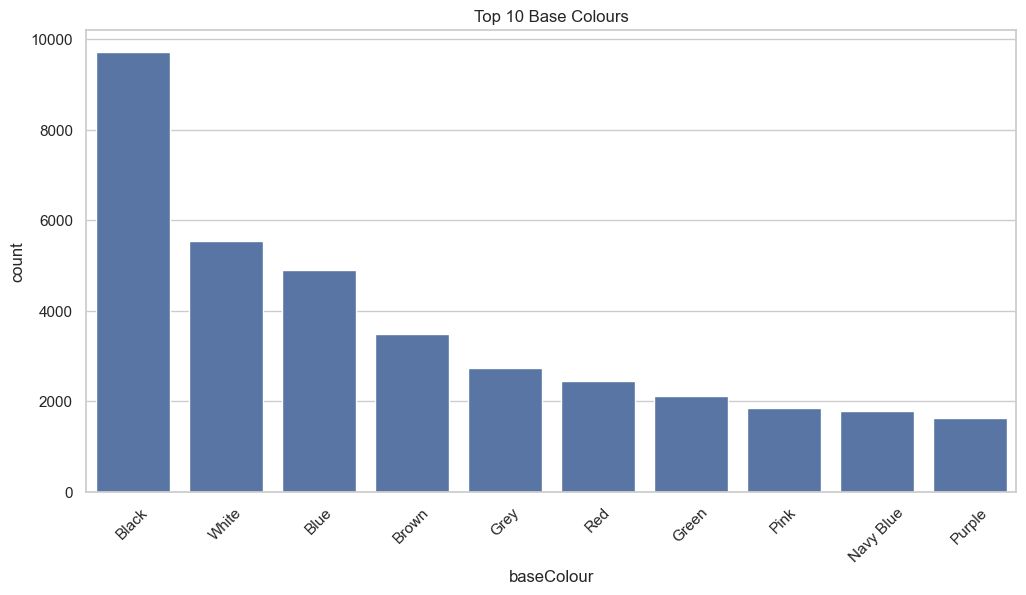

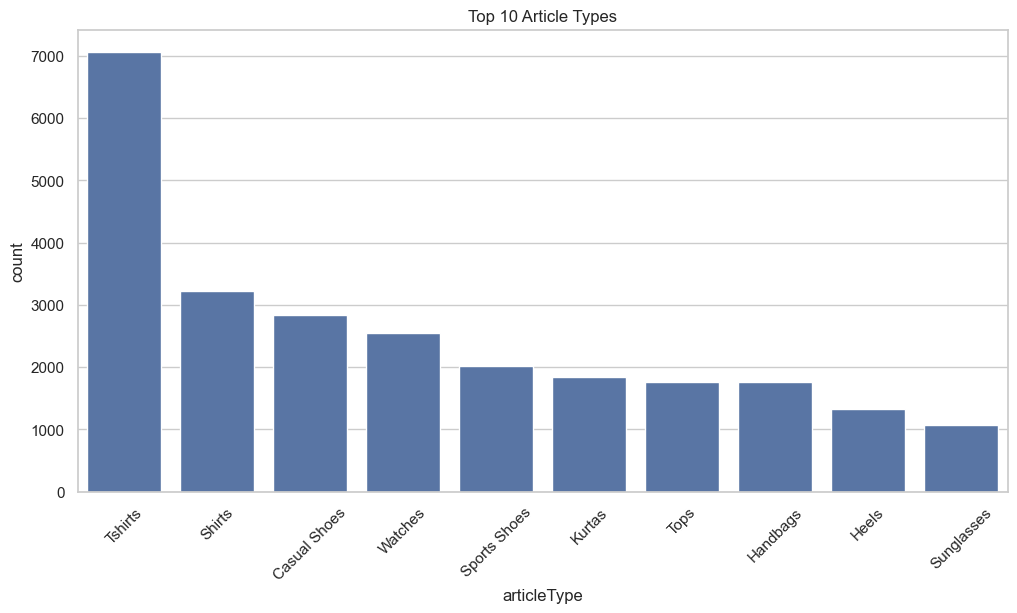

In [4]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="gender", order=df["gender"].value_counts().index)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="season", order=df["season"].value_counts().index)
plt.title("Season Distribution")
plt.show()

plt.figure(figsize=(12, 6))
top_colors = df["baseColour"].value_counts().nlargest(10).index
sns.countplot(data=df[df["baseColour"].isin(top_colors)], x="baseColour", order=top_colors)
plt.title("Top 10 Base Colours")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
top_articles = df["articleType"].value_counts().nlargest(10).index
sns.countplot(data=df[df["articleType"].isin(top_articles)], x="articleType", order=top_articles)
plt.title("Top 10 Article Types")
plt.xticks(rotation=45)
plt.show()


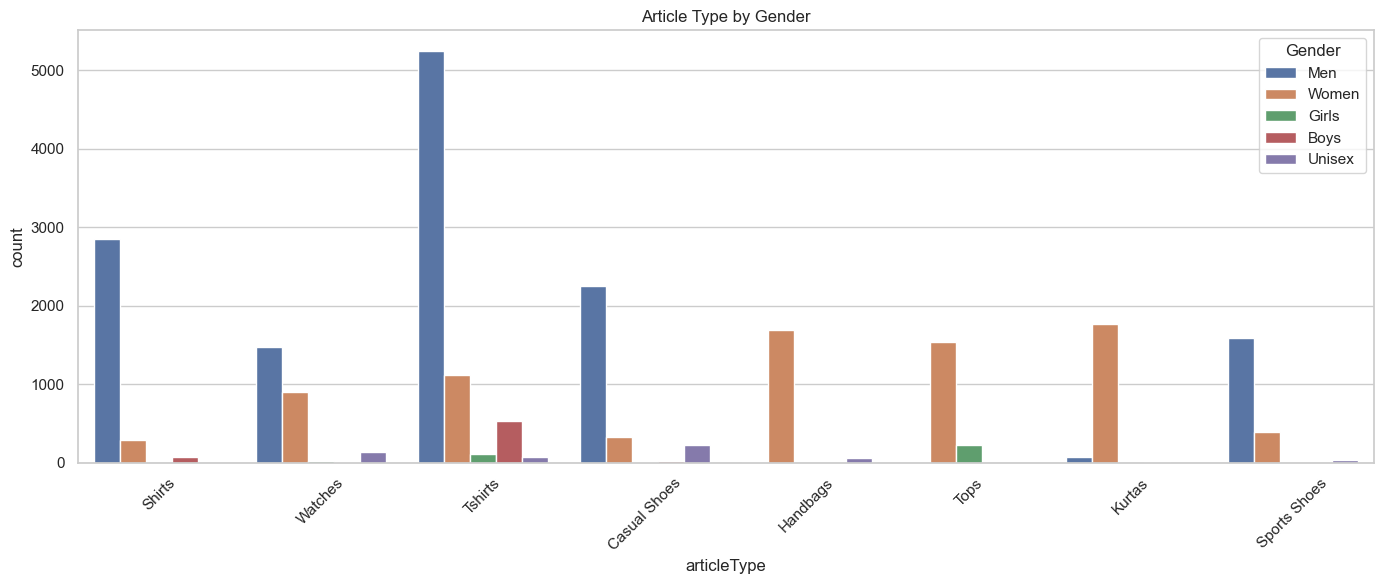

In [5]:
plt.figure(figsize=(14, 6))
top_articles = df["articleType"].value_counts().nlargest(8).index
sns.countplot(data=df[df["articleType"].isin(top_articles)],
              x="articleType", hue="gender")
plt.title("Article Type by Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


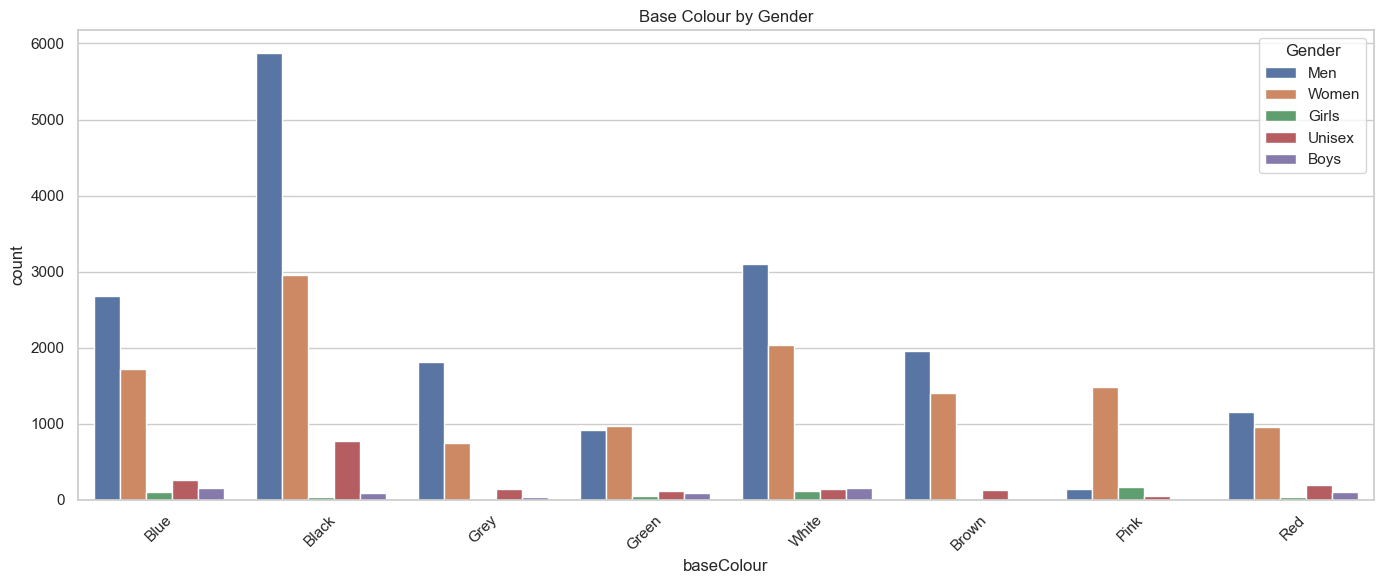

In [6]:
plt.figure(figsize=(14, 6))
top_colors = df["baseColour"].value_counts().nlargest(8).index
sns.countplot(data=df[df["baseColour"].isin(top_colors)],
              x="baseColour", hue="gender")
plt.title("Base Colour by Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


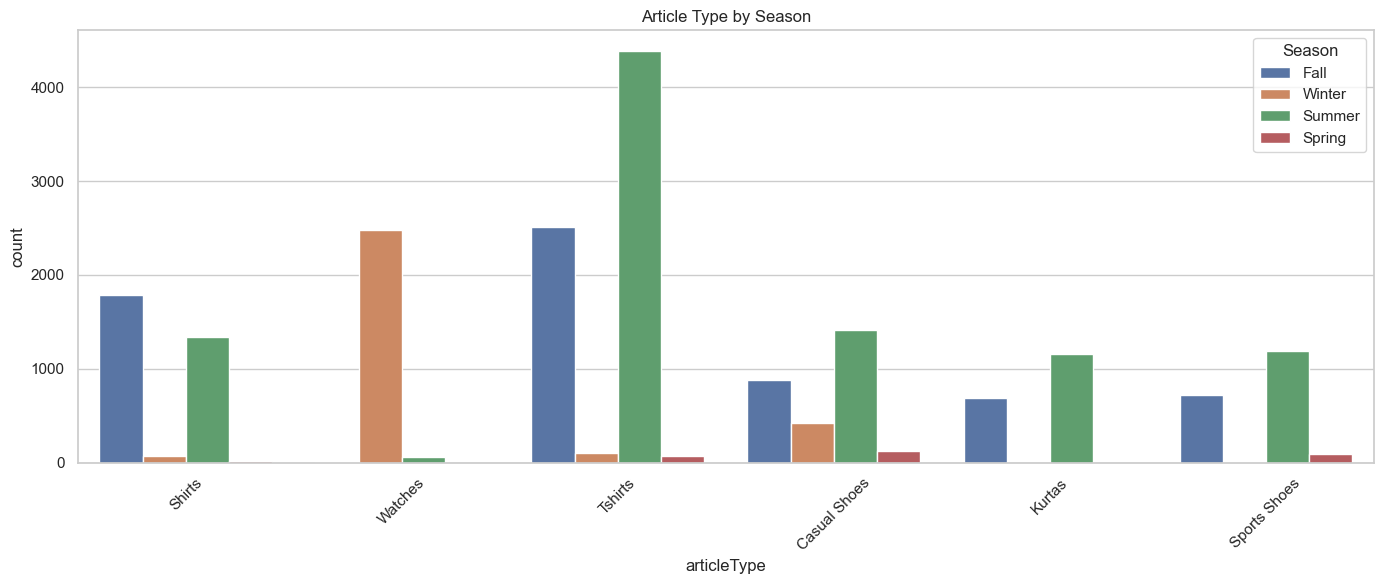

In [7]:
plt.figure(figsize=(14, 6))
top_articles = df["articleType"].value_counts().nlargest(6).index
sns.countplot(data=df[df["articleType"].isin(top_articles)],
              x="articleType", hue="season")
plt.title("Article Type by Season")
plt.xticks(rotation=45)
plt.legend(title="Season")
plt.tight_layout()
plt.show()


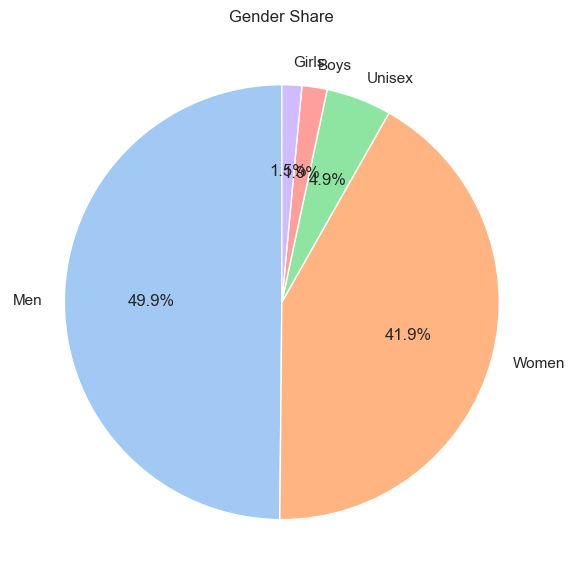

In [8]:
plt.figure(figsize=(6,6))
df["gender"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.ylabel("")
plt.title("Gender Share")
plt.tight_layout()
plt.show()


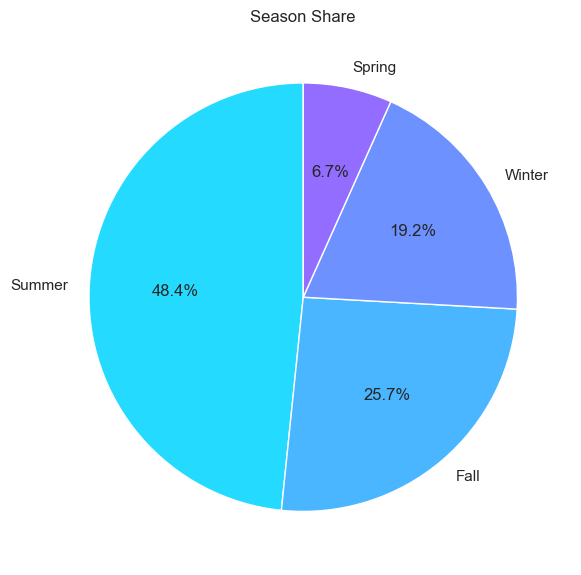

In [9]:
plt.figure(figsize=(6,6))
df["season"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=sns.color_palette("cool"))
plt.ylabel("")
plt.title("Season Share")
plt.tight_layout()
plt.show()
